In [1]:
import pandas as pd
from pandas import DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

Explore the options to parse a datetime in given format , unfortunately the datatype remains Object !!

In [2]:
d = 'Monday, 31 December 2007'
#Chan = pd.to_datetime(d, format="%A, %d %B %Y")
#Chan = datetime.strptime(d, "%A, %d %B %Y")
Chan = pd.to_datetime(d, unit='D', errors='ignore')
print(type(Chan))
Chan


<class 'numpy.str_'>


'Monday, 31 December 2007'

In [3]:
Channel_Volume = pd.read_csv('Data/Channel_Volume.csv', parse_dates=['Year_text', 'Year_date'])
Channel_Volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          8468 non-null   int64         
 1   Industry          8468 non-null   object        
 2   Edition           8468 non-null   int64         
 3   Category          8464 non-null   object        
 4   Subcategory       8468 non-null   object        
 5   Hierarchy_Level   8468 non-null   int64         
 6   Data_Type         8468 non-null   object        
 7   Outlet            8468 non-null   object        
 8   Outlet_Hierarchy  8468 non-null   int64         
 9   Unit              8468 non-null   object        
 10  Year_text         8468 non-null   datetime64[ns]
 11  Year_date         8468 non-null   datetime64[ns]
 12  Volume            8468 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(7)
memory usage: 860.2+ KB


In [4]:
Locations = pd.read_csv('Data/Locations.csv', sep=';')
Locations.head()

,id,0,1,0.1,2,0.2,3,0.3,4,0.4,5,0.5,6,0.6,7,0.7,8,0.8
0,Region,NaN,Asia Pacific,NaN,Australasia,NaN,Eastern Europe,NaN,Latin America,NaN,Middle East and Africa,NaN,North America,NaN,Western Europe,NaN,World,NaN
1,Country,NaN,Asia Pacific,NaN,Australasia,NaN,Eastern Europe,NaN,Latin America,NaN,Middle East and Africa,NaN,North America,NaN,Western Europe,NaN,World,NaN


In [5]:
Locations = pd.read_csv('Data/Locations.csv', sep=';')

Locations = Locations.T

Locations.dropna(inplace=True)
Locations.reindex()
Locations.columns = Locations.iloc[0]
Locations = Locations.iloc[1:]
# define new DataFrame
df = DataFrame(Locations, columns=['Region', 'Country'])

print(Locations.columns)
df['Location'] = df.reset_index().index
df.set_index('Location', inplace=True)
df['Region']


Index(['Region', 'Country'], dtype='object', name='id')


Location
0              Asia Pacific
1               Australasia
2            Eastern Europe
3             Latin America
4    Middle East and Africa
5             North America
6            Western Europe
7                     World
Name: Region, dtype: object

In [6]:
Channel_Volume = pd.read_csv('Data/Channel_Volume.csv')
Channel_Volume['Location'] = Channel_Volume['Location'].rename('id').astype(int)
#df = pd.concat([Channel_Volume,Locations], axis=0)
Channel_Volume = Channel_Volume.join(df['Region'],on='Location')
Channel_Volume.drop('Location', axis=1, inplace=True)
Channel_Volume.rename(columns={"Region": "Location"}, inplace=True)

Channel_Volume

,Industry,Edition,Category,Subcategory,Hierarchy_Level,Data_Type,Outlet,Outlet_Hierarchy,Unit,Year_text,Year_date,Volume,Location
0,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2007,"Monday, 31 December 2007","2613,845506",Australasia
1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2008,"Wednesday, 31 December 2008","2513,025824",Australasia
2,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2009,"Thursday, 31 December 2009","2421,088595",Australasia
3,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2010,"Friday, 31 December 2010","2422,128432",Australasia
4,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2011,"Saturday, 31 December 2011","2439,33622",Australasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Store-Based Retailing,1,million litres,2017,"Sunday, 31 December 2017","16514,21084",World
8464,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Store-Based Retailing,1,million litres,2018,"Monday, 31 December 2018","16522,15239",World
8465,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Store-Based Retailing,1,million litres,2019,"Tuesday, 31 December 2019","16544,60644",World
8466,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Store-Based Retailing,1,million litres,2020,"Thursday, 31 December 2020","16626,5149",World


In [7]:
Channel_Volume['Category'].value_counts()

Wine                           1829
Beer                           1765
Spirits                        1667
RTDs/High-Strength Premixes    1656
Cider/Perry                    1547
Name: Category, dtype: int64

In [8]:
Channel_Volume['Hierarchy_Level'].value_counts()

1    8468
Name: Hierarchy_Level, dtype: int64

In [9]:
Channel_Volume['Subcategory'].value_counts()

Wine                           1830
Beer                           1766
Spirits                        1667
RTDs/High-Strength Premixes    1656
Cider/Perry                    1549
Name: Subcategory, dtype: int64

In [10]:
Channel_Volume['Volume'] = Channel_Volume['Volume'].str.replace(',', '.')
Channel_Volume['Volume'] = Channel_Volume['Volume'].astype('float')
Channel_Volume['Volume']

0        2613.845506
1        2513.025824
2        2421.088595
3        2422.128432
4        2439.336220
            ...     
8463    16514.210840
8464    16522.152390
8465    16544.606440
8466    16626.514900
8467    16664.638000
Name: Volume, Length: 8468, dtype: float64

In [11]:
Market_Sizes = pd.read_csv('Data/Market_Sizes.csv', sep=',')
Market_Sizes.head()

,Location,Industry,Subcategory,Hierarchy_Level,Data_Type,Unit,Current_Constant,Currency_Conversion,Year,Year_date,RSP,Volume,Year_minus_2016,Year_minus_2022,Edition
0,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2016,31-Dec-16,301.0,27.0,4,-2,2022
1,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2017,31-Dec-17,318.0,28.0,5,-1,2022
2,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2018,31-Dec-18,458.0,40.0,6,0,2022
3,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2019,31-Dec-19,612.0,51.0,7,1,2022
4,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2020,31-Dec-20,774.0,62.0,8,2,2022


In [12]:
Company_Share_GBO_unit = pd.read_csv('Data/Company_Share_GBO_unit.csv', sep=';')
Company_Share_GBO_unit.head()

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
0,8,Alcoholic Drinks,13,1,Total Volume,Anheuser-Busch InBev NV,million litres,2016,31-12-16,4,"35506,37732"
1,8,Alcoholic Drinks,13,1,Total Volume,Heineken NV,million litres,2016,"Saturday, 31 Dec 2016",4,"18482,5958"
2,8,Alcoholic Drinks,13,1,Total Volume,Carlsberg A/S,million litres,2016,31-12-16,4,"11121,69868"
3,8,Alcoholic Drinks,13,1,Total Volume,Dragonyte Brewery,million litres,2016,31-Dec-16,4,"6252,38259"
4,8,Alcoholic Drinks,13,1,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016,31 12 2016,4,"7834,494901"


Join Categories & Subcategories

In [13]:
# read & rename
Categories = pd.read_csv('Data/Categories.csv', sep=',')
Subcategories = pd.read_csv('Data/Subcategories.csv', sep=',')
Subcategories['id'] = Subcategories['id'].astype(int)
Categories.rename(columns = {Categories.columns[1]:'Sub_Name'}, inplace=True)
Categories.set_index('id', inplace=True)
Categories.head()

,Sub_Name
id,
1,Beer
2,Wine
3,Spirits
4,RTDs/High-Strength Premixes
5,Cider/Perry


In [14]:
Subcategories

,id,Category,Name
0,1,1,Ale
1,2,1,Weissbier/Weizen/Wheat Beer
2,3,1,Flavoured/Mixed Lager
3,4,1,Standard Lager
4,5,1,Sorghum
5,6,1,Stout
6,7,1,Non Alcoholic Beer
7,8,1,Lager
8,9,1,Dark Beer
9,10,1,Premium Lager


In [15]:
Sub = Subcategories.join(Categories, on='Category', how='right').reset_index(drop=True)
Sub


,id,Category,Name,Sub_Name
0,1,1,Ale,Beer
1,2,1,Weissbier/Weizen/Wheat Beer,Beer
2,3,1,Flavoured/Mixed Lager,Beer
3,4,1,Standard Lager,Beer
4,5,1,Sorghum,Beer
5,6,1,Stout,Beer
6,7,1,Non Alcoholic Beer,Beer
7,8,1,Lager,Beer
8,9,1,Dark Beer,Beer
9,10,1,Premium Lager,Beer


In [16]:

Channel_Volume = pd.read_csv('Data/Channel_Volume.csv')
Channel_Volume['Year_date'] = pd.to_datetime(Channel_Volume['Year_date'], errors='ignore')
Channel_Volume['Location'] = Channel_Volume['Location'].rename('id').astype(int)

Channel_Volume = Channel_Volume.join(df['Region'],on='Location')
Channel_Volume.drop('Location', axis=1, inplace=True)
Channel_Volume.rename(columns={"Region": "Location"}, inplace=True)
Channel_Volume['Volume'] = Channel_Volume['Volume'].str.replace(',', '.')
Channel_Volume['Volume'] = Channel_Volume['Volume'].astype('float')
Channel_Volume['Volume']
Channel_Volume.dtypes

Industry                    object
Edition                      int64
Category                    object
Subcategory                 object
Hierarchy_Level              int64
Data_Type                   object
Outlet                      object
Outlet_Hierarchy             int64
Unit                        object
Year_text                    int64
Year_date           datetime64[ns]
Volume                     float64
Location                    object
dtype: object

In [17]:
Channel_Volume.head()

,Industry,Edition,Category,Subcategory,Hierarchy_Level,Data_Type,Outlet,Outlet_Hierarchy,Unit,Year_text,Year_date,Volume,Location
0,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2007,2007-12-31,2613.845506,Australasia
1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2008,2008-12-31,2513.025824,Australasia
2,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2009,2009-12-31,2421.088595,Australasia
3,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2010,2010-12-31,2422.128432,Australasia
4,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2011,2011-12-31,2439.336220,Australasia


In [18]:
for var in Channel_Volume.columns:
    if Channel_Volume[var].dtypes == 'O':
        Channel_Volume[var] = Channel_Volume[var].astype('category')
        print(var)
Channel_Volume.dtypes
Channel_Volume.to_csv('Channel_Volume.csv')

Industry
Category
Subcategory
Data_Type
Outlet
Unit
Location


In [19]:
Company_Share_GBO_unit = pd.read_csv('Data/Company_Share_GBO_unit.csv', sep=';')
print(len(Company_Share_GBO_unit))
Company_Share_GBO_unit['Year_date'].value_counts()

21668


Tuesday, 31 Dec 2019     982
31-12-17                 945
31-12-16                 933
Monday, 31 Dec 2018      918
Sunday, 31 Dec 2017      913
31 12 2016               911
31-12-18                 908
Friday, 31 Dec 2021      907
Saturday, 31 Dec 2016    907
31-12-20                 905
Thursday, 31 Dec 2020    896
31 12 2018               891
31-12-21                 886
31 12 2020               883
31 12 2019               880
31 12 2017               874
31-12-19                 871
31 12 2021               849
31-Dec-16                564
31-Dec-18                564
31-Dec-21                544
31-Dec-17                543
31-Dec-19                518
31-Dec-20                517
Thu, 31 December 2020    372
Sun, 31 December 2017    372
Sat, 31 December 2016    359
Fri, 31 December 2021    353
Tue, 31 December 2019    353
Mon, 31 December 2018    350
Name: Year_date, dtype: int64

In [20]:
Company_Share_GBO_unit['Volume'] = Company_Share_GBO_unit['Volume'].str.replace(',', '.')
Company_Share_GBO_unit['Volume'] = Company_Share_GBO_unit['Volume'].astype('float')

Company_Share_GBO_unit['Year_date'] = pd.to_datetime(Company_Share_GBO_unit['Year_date'], dayfirst=True, errors='coerce', infer_datetime_format=True)
Company_Share_GBO_unit.dropna(inplace=True)
len(Company_Share_GBO_unit)

21668

In [21]:
Company_Share_GBO_unit['Year_date'].value_counts()

2016-12-31    3674
2017-12-31    3647
2018-12-31    3631
2019-12-31    3604
2020-12-31    3573
2021-12-31    3539
Name: Year_date, dtype: int64

In [22]:
Company_Share_GBO_unit.head()

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
0,8,Alcoholic Drinks,13,1,Total Volume,Anheuser-Busch InBev NV,million litres,2016,2016-12-31,4,35506.377320
1,8,Alcoholic Drinks,13,1,Total Volume,Heineken NV,million litres,2016,2016-12-31,4,18482.595800
2,8,Alcoholic Drinks,13,1,Total Volume,Carlsberg A/S,million litres,2016,2016-12-31,4,11121.698680
3,8,Alcoholic Drinks,13,1,Total Volume,Dragonyte Brewery,million litres,2016,2016-12-31,4,6252.382590
4,8,Alcoholic Drinks,13,1,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016,2016-12-31,4,7834.494901


In [23]:
for var in Company_Share_GBO_unit.columns[:-1]:
    if Company_Share_GBO_unit[var].dtypes == 'O':
        Company_Share_GBO_unit[var] = Company_Share_GBO_unit[var].astype('category')
    if Company_Share_GBO_unit[var].dtypes == 'float64':
        Company_Share_GBO_unit[var] = Company_Share_GBO_unit[var].astype(int)
Company_Share_GBO_unit.dtypes

Location                       int64
Industry                    category
Subcategory_ID                 int64
Hierarchy_Level                int64
Data_Type                   category
Global_Brand_Owner          category
Unit                        category
Year_text                      int64
Year_date             datetime64[ns]
Year_minus_2016                int64
Volume                       float64
dtype: object

In [24]:
Company_Share_GBO_unit['Year_date'].value_counts()

2016-12-31    3674
2017-12-31    3647
2018-12-31    3631
2019-12-31    3604
2020-12-31    3573
2021-12-31    3539
Name: Year_date, dtype: int64

In [25]:
Company_Share_GBO_unit.head()

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
0,8,Alcoholic Drinks,13,1,Total Volume,Anheuser-Busch InBev NV,million litres,2016,2016-12-31,4,35506.377320
1,8,Alcoholic Drinks,13,1,Total Volume,Heineken NV,million litres,2016,2016-12-31,4,18482.595800
2,8,Alcoholic Drinks,13,1,Total Volume,Carlsberg A/S,million litres,2016,2016-12-31,4,11121.698680
3,8,Alcoholic Drinks,13,1,Total Volume,Dragonyte Brewery,million litres,2016,2016-12-31,4,6252.382590
4,8,Alcoholic Drinks,13,1,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016,2016-12-31,4,7834.494901


In [26]:
Company_Share_GBO_unit.describe()

,Location,Subcategory_ID,Hierarchy_Level,Year_text,Year_minus_2016,Volume
count,21668.000000,21668.000000,21668.000000,21668.000000,21668.000000,21668.000000
mean,5.098163,10.877100,1.964833,2018.478678,6.478678,452.688334
std,2.502117,4.748037,1.119920,1.706875,1.706875,2127.966877
min,1.000000,1.000000,1.000000,2016.000000,4.000000,0.000281
25%,3.000000,8.000000,1.000000,2017.000000,5.000000,4.557284
50%,5.000000,13.000000,1.000000,2018.000000,6.000000,24.263663
75%,8.000000,15.000000,3.000000,2020.000000,8.000000,128.883836
max,8.000000,17.000000,4.000000,2021.000000,9.000000,52545.433070


In [27]:
Market_Sizes = pd.read_csv('Data/Market_Sizes.csv', sep=',')
Market_Sizes['Year_date'] = pd.to_datetime(Market_Sizes['Year_date'], dayfirst=True, errors='coerce', infer_datetime_format=True)
for var in Market_Sizes.columns[:-1]:
    if Market_Sizes[var].dtypes == 'O':
        Market_Sizes[var] = Market_Sizes[var].astype('category')
Market_Sizes.head()

,Location,Industry,Subcategory,Hierarchy_Level,Data_Type,Unit,Current_Constant,Currency_Conversion,Year,Year_date,RSP,Volume,Year_minus_2016,Year_minus_2022,Edition
0,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2016,2016-12-31,301.0,27.0,4,-2,2022
1,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2017,2017-12-31,318.0,28.0,5,-1,2022
2,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2018,2018-12-31,458.0,40.0,6,0,2022
3,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2019,2019-12-31,612.0,51.0,7,1,2022
4,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Consta...","Historic Fixed 2021 Exchange Rates, Forecast F...",2020,2020-12-31,774.0,62.0,8,2,2022


In [28]:
Market_Sizes.dtypes

Location                        int64
Industry                     category
Subcategory                     int64
Hierarchy_Level                 int64
Data_Type                    category
Unit                         category
Current_Constant             category
Currency_Conversion          category
Year                            int64
Year_date              datetime64[ns]
RSP                           float64
Volume                        float64
Year_minus_2016                 int64
Year_minus_2022                 int64
Edition                         int64
dtype: object

In [29]:
Company_Share_GBO_unit.dtypes

Location                       int64
Industry                    category
Subcategory_ID                 int64
Hierarchy_Level                int64
Data_Type                   category
Global_Brand_Owner          category
Unit                        category
Year_text                      int64
Year_date             datetime64[ns]
Year_minus_2016                int64
Volume                       float64
dtype: object

In [30]:
Channel_Volume = pd.read_csv('Data/Channel_Volume.csv', parse_dates=['Year_date'])
Channel_Volume.head()

,Location,Industry,Edition,Category,Subcategory,Hierarchy_Level,Data_Type,Outlet,Outlet_Hierarchy,Unit,Year_text,Year_date,Volume
0,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2007,2007-12-31,"2613,845506"
1,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2008,2008-12-31,"2513,025824"
2,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2009,2009-12-31,"2421,088595"
3,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2010,2010-12-31,"2422,128432"
4,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2011,2011-12-31,"2439,33622"


In [31]:
Channel_Volume = pd.read_csv('Data/Channel_Volume.csv', parse_dates=['Year_date'])
Channel_Volume['Location'] = Channel_Volume['Location'].rename('id').astype(int)
Channel_Volume['Year_text'] = Channel_Volume['Year_text'].rename('id').astype(int)
Channel_Volume['Volume'] = Channel_Volume['Volume'].str.replace(',', '.')
Channel_Volume['Volume'] = Channel_Volume['Volume'].astype('float')
for var in Channel_Volume.columns[:-1]:
    if Channel_Volume[var].dtypes == 'O':
        Channel_Volume[var] = Channel_Volume[var].astype('category')
Channel_Volume.reindex()
Channel_Volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          8468 non-null   int64         
 1   Industry          8468 non-null   category      
 2   Edition           8468 non-null   int64         
 3   Category          8464 non-null   category      
 4   Subcategory       8468 non-null   category      
 5   Hierarchy_Level   8468 non-null   int64         
 6   Data_Type         8468 non-null   category      
 7   Outlet            8468 non-null   category      
 8   Outlet_Hierarchy  8468 non-null   int64         
 9   Unit              8468 non-null   category      
 10  Year_text         8468 non-null   int64         
 11  Year_date         8468 non-null   datetime64[ns]
 12  Volume            8468 non-null   float64       
dtypes: category(6), datetime64[ns](1), float64(1), int64(5)
memory usage: 514.3 KB

In [32]:
df2 = Company_Share_GBO_unit.merge(Channel_Volume, on=['Year_date', 'Industry', 'Hierarchy_Level', 'Location', 'Year_text', 'Unit' ])
print(len(df2.columns))
print(df2.head())

18
   Location          Industry  Subcategory_ID  Hierarchy_Level   Data_Type_x  \
0         7  Alcoholic Drinks              13                1  Total Volume   
1         7  Alcoholic Drinks              13                1  Total Volume   
2         7  Alcoholic Drinks              13                1  Total Volume   
3         7  Alcoholic Drinks              13                1  Total Volume   
4         7  Alcoholic Drinks              13                1  Total Volume   

  Global_Brand_Owner            Unit  Year_text  Year_date  Year_minus_2016  \
0        Heineken NV  million litres       2016 2016-12-31                4   
1        Heineken NV  million litres       2016 2016-12-31                4   
2        Heineken NV  million litres       2016 2016-12-31                4   
3        Heineken NV  million litres       2016 2016-12-31                4   
4        Heineken NV  million litres       2016 2016-12-31                4   

      Volume_x  Edition Category Subcateg

In [33]:
df2.corr(numeric_only=True)

,Location,Subcategory_ID,Hierarchy_Level,Year_text,Year_minus_2016,Volume_x,Edition,Outlet_Hierarchy,Volume_y
Location,1.000000,0.077624,NaN,0.001329,0.001329,-0.049155,NaN,-0.009825,-0.067086
Subcategory_ID,0.077624,1.000000,NaN,0.014861,0.014861,-0.237704,NaN,0.009682,-0.231202
Hierarchy_Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_text,0.001329,0.014861,NaN,1.000000,1.000000,0.001781,NaN,-0.002186,-0.006137
Year_minus_2016,0.001329,0.014861,NaN,1.000000,1.000000,0.001781,NaN,-0.002186,-0.006137
Volume_x,-0.049155,-0.237704,NaN,0.001781,0.001781,1.000000,NaN,0.000297,0.071473
Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Hierarchy,-0.009825,0.009682,NaN,-0.002186,-0.002186,0.000297,NaN,1.000000,-0.161489
Volume_y,-0.067086,-0.231202,NaN,-0.006137,-0.006137,0.071473,NaN,-0.161489,1.000000


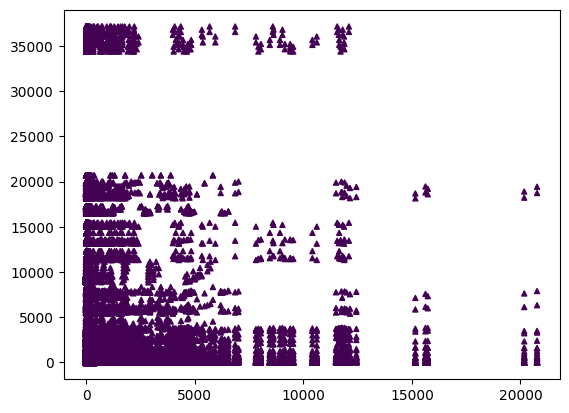

In [34]:
plt.scatter(df2['Volume_x'], df2['Volume_y'], s=df2['Subcategory_ID'], marker='^', c=df2['Hierarchy_Level'])
#plt.scatter(df2['Volume_y'], df2['Year_text'], s=df2['Subcategory_ID'], marker='o', c=df2['Hierarchy_Level'])
plt.show()

In [35]:
Channel_Volume.head()

,Location,Industry,Edition,Category,Subcategory,Hierarchy_Level,Data_Type,Outlet,Outlet_Hierarchy,Unit,Year_text,Year_date,Volume
0,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2007,2007-12-31,2613.845506
1,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2008,2008-12-31,2513.025824
2,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2009,2009-12-31,2421.088595
3,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2010,2010-12-31,2422.128432
4,1,Alcoholic Drinks,2022,Beer,Beer,1,Off-trade Volume,Food/drink/tobacco specialists,3,million litres,2011,2011-12-31,2439.336220


In [36]:
Company_Share_GBO_unit.reindex(axis=0)
Company_Share_GBO_unit.head()

,Location,Industry,Subcategory_ID,Hierarchy_Level,Data_Type,Global_Brand_Owner,Unit,Year_text,Year_date,Year_minus_2016,Volume
0,8,Alcoholic Drinks,13,1,Total Volume,Anheuser-Busch InBev NV,million litres,2016,2016-12-31,4,35506.377320
1,8,Alcoholic Drinks,13,1,Total Volume,Heineken NV,million litres,2016,2016-12-31,4,18482.595800
2,8,Alcoholic Drinks,13,1,Total Volume,Carlsberg A/S,million litres,2016,2016-12-31,4,11121.698680
3,8,Alcoholic Drinks,13,1,Total Volume,Dragonyte Brewery,million litres,2016,2016-12-31,4,6252.382590
4,8,Alcoholic Drinks,13,1,Total Volume,Tsingtao Brewery Co Ltd,million litres,2016,2016-12-31,4,7834.494901


In [37]:

Channel_Volume.sort_values(by='Year_date', inplace=True)
Company_Share_GBO_unit.sort_values(by='Year_date', inplace=True)
df_merge_asof = pd.merge_asof(Company_Share_GBO_unit, Channel_Volume, on='Year_date', by='Location')
print(df_merge_asof.head())
df_merge_asof.columns

   Location        Industry_x  Subcategory_ID  Hierarchy_Level_x  \
0         8  Alcoholic Drinks              13                  1   
1         6  Alcoholic Drinks               1                  3   
2         6  Alcoholic Drinks               1                  3   
3         6  Alcoholic Drinks               1                  3   
4         6  Alcoholic Drinks               1                  3   

    Data_Type_x        Global_Brand_Owner          Unit_x  Year_text_x  \
0  Total Volume   Anheuser-Busch InBev NV  million litres         2016   
1  Total Volume    New Belgium Brewing Co  million litres         2016   
2  Total Volume  Sierra Nevada Brewing Co  million litres         2016   
3  Total Volume   Boston Beer Co Inc, The  million litres         2016   
4  Total Volume         Dragonyte Brewery  million litres         2016   

   Year_date  Year_minus_2016  ...  Edition Category  Subcategory  \
0 2016-12-31                4  ...      NaN      NaN          NaN   
1 2016-1

Index(['Location', 'Industry_x', 'Subcategory_ID', 'Hierarchy_Level_x',
       'Data_Type_x', 'Global_Brand_Owner', 'Unit_x', 'Year_text_x',
       'Year_date', 'Year_minus_2016', 'Volume_x', 'Industry_y', 'Edition',
       'Category', 'Subcategory', 'Hierarchy_Level_y', 'Data_Type_y', 'Outlet',
       'Outlet_Hierarchy', 'Unit_y', 'Year_text_y', 'Volume_y'],
      dtype='object')

In [38]:
tab_join = pd.merge(Company_Share_GBO_unit, Channel_Volume, on=['Location'], how = 'inner')

tab_join.columns

print(tab_join.head())
print(tab_join.columns)

   Location        Industry_x  Subcategory_ID  Hierarchy_Level_x  \
0         6  Alcoholic Drinks               1                  3   
1         6  Alcoholic Drinks               1                  3   
2         6  Alcoholic Drinks               1                  3   
3         6  Alcoholic Drinks               1                  3   
4         6  Alcoholic Drinks               1                  3   

    Data_Type_x      Global_Brand_Owner          Unit_x  Year_text_x  \
0  Total Volume  New Belgium Brewing Co  million litres         2016   
1  Total Volume  New Belgium Brewing Co  million litres         2016   
2  Total Volume  New Belgium Brewing Co  million litres         2016   
3  Total Volume  New Belgium Brewing Co  million litres         2016   
4  Total Volume  New Belgium Brewing Co  million litres         2016   

  Year_date_x  Year_minus_2016  ...                     Category  \
0  2016-12-31                4  ...                         Beer   
1  2016-12-31         

In [39]:
df_merge_asof.corr(numeric_only=True)

,Location,Subcategory_ID,Hierarchy_Level_x,Year_text_x,Year_minus_2016,Volume_x,Edition,Hierarchy_Level_y,Outlet_Hierarchy,Year_text_y,Volume_y
Location,1.000000,-0.058816,0.041865,-0.005718,-0.005718,0.057950,NaN,NaN,-0.232615,-0.002161,0.271840
Subcategory_ID,-0.058816,1.000000,-0.637523,-0.006203,-0.006203,-0.067008,NaN,NaN,0.031585,-0.007198,-0.021924
Hierarchy_Level_x,0.041865,-0.637523,1.000000,0.000839,0.000839,0.076210,NaN,NaN,-0.017897,0.001034,0.016568
Year_text_x,-0.005718,-0.006203,0.000839,1.000000,1.000000,0.001604,NaN,NaN,-0.063206,1.000000,0.325745
Year_minus_2016,-0.005718,-0.006203,0.000839,1.000000,1.000000,0.001604,NaN,NaN,-0.063206,1.000000,0.325745
Volume_x,0.057950,-0.067008,0.076210,0.001604,0.001604,1.000000,NaN,NaN,0.038117,0.000951,-0.018683
Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hierarchy_Level_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Hierarchy,-0.232615,0.031585,-0.017897,-0.063206,-0.063206,0.038117,NaN,NaN,1.000000,-0.063206,-0.418484
Year_text_y,-0.002161,-0.007198,0.001034,1.000000,1.000000,0.000951,NaN,NaN,-0.063206,1.000000,0.325745


In [40]:
Company_Share_GBO_unit.sort_values(by='Year_date', inplace=True)
Market_Sizes.sort_values(by='Year_date', inplace=True)
df_merge_asof = pd.merge_asof(Company_Share_GBO_unit, Market_Sizes, on='Year_date', by='Location')
df_merge_asof.head()
df_merge_asof.columns

Index(['Location', 'Industry_x', 'Subcategory_ID', 'Hierarchy_Level_x',
       'Data_Type_x', 'Global_Brand_Owner', 'Unit_x', 'Year_text', 'Year_date',
       'Year_minus_2016_x', 'Volume_x', 'Industry_y', 'Subcategory',
       'Hierarchy_Level_y', 'Data_Type_y', 'Unit_y', 'Current_Constant',
       'Currency_Conversion', 'Year', 'RSP', 'Volume_y', 'Year_minus_2016_y',
       'Year_minus_2022', 'Edition'],
      dtype='object')

In [41]:
#Channel_Volume
#Company_Share_GBO_unit
#Market_Sizes
tab_join = pd.merge(Company_Share_GBO_unit, Market_Sizes, on=['Location'], how = 'inner')

tab_join.columns

print(tab_join.head())
print(tab_join.columns)

   Location        Industry_x  Subcategory_ID  Hierarchy_Level_x  \
0         4  Alcoholic Drinks              16                  1   
1         4  Alcoholic Drinks              16                  1   
2         4  Alcoholic Drinks              16                  1   
3         4  Alcoholic Drinks              16                  1   
4         4  Alcoholic Drinks              16                  1   

    Data_Type_x   Global_Brand_Owner      Unit_x  Year_text Year_date_x  \
0  Total Volume  Industrias Bravo CA  000 litres       2016  2016-12-31   
1  Total Volume  Industrias Bravo CA  000 litres       2016  2016-12-31   
2  Total Volume  Industrias Bravo CA  000 litres       2016  2016-12-31   
3  Total Volume  Industrias Bravo CA  000 litres       2016  2016-12-31   
4  Total Volume  Industrias Bravo CA  000 litres       2016  2016-12-31   

   Year_minus_2016_x  ...       Unit_y  \
0                  4  ...  USD million   
1                  4  ...  USD million   
2             

In [42]:
tab_join = pd.merge(Company_Share_GBO_unit, Market_Sizes, on=['Year_date'], how = 'inner')
print(tab_join.columns)
print(len(tab_join.columns))

Index(['Location_x', 'Industry_x', 'Subcategory_ID', 'Hierarchy_Level_x',
       'Data_Type_x', 'Global_Brand_Owner', 'Unit_x', 'Year_text', 'Year_date',
       'Year_minus_2016_x', 'Volume_x', 'Location_y', 'Industry_y',
       'Subcategory', 'Hierarchy_Level_y', 'Data_Type_y', 'Unit_y',
       'Current_Constant', 'Currency_Conversion', 'Year', 'RSP', 'Volume_y',
       'Year_minus_2016_y', 'Year_minus_2022', 'Edition'],
      dtype='object')
25


In [43]:
Chan = df2.join(df['Region'], on='Location')
Chan.drop('Location', axis=1, inplace=True)
Chan.rename(columns={"Region": "Location"}, inplace=True)
Chan["Location"].value_counts()


World                     84400
Latin America             75604
Australasia               62395
Middle East and Africa    54985
North America             32636
Western Europe            31222
Eastern Europe            19058
Name: Location, dtype: int64

In [89]:
df3 = pd.read_csv('Channel_Volume.csv', parse_dates=['Year_date'], index_col='Year_date')
#df3['Volume'] = df3['Volume'].str.replace(',', '.')
#df3['Volume'] = df3['Volume'].astype('float')

del df3['Industry']
del df3['Data_Type']
df3.set_index('Year_date', inplace=True)


,Unnamed: 0,Edition,Category,Subcategory,Hierarchy_Level,Outlet,Outlet_Hierarchy,Unit,Year_text,Volume,Location
Year_date,,,,,,,,,,,
2007-12-31,0,2022,Beer,Beer,1,Food/drink/tobacco specialists,3,million litres,2007,2613.845506,Australasia
2008-12-31,1,2022,Beer,Beer,1,Food/drink/tobacco specialists,3,million litres,2008,2513.025824,Australasia
2009-12-31,2,2022,Beer,Beer,1,Food/drink/tobacco specialists,3,million litres,2009,2421.088595,Australasia
2010-12-31,3,2022,Beer,Beer,1,Food/drink/tobacco specialists,3,million litres,2010,2422.128432,Australasia
2011-12-31,4,2022,Beer,Beer,1,Food/drink/tobacco specialists,3,million litres,2011,2439.336220,Australasia
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,8463,2022,Beer,Beer,1,Store-Based Retailing,1,million litres,2017,16514.210840,World
2018-12-31,8464,2022,Beer,Beer,1,Store-Based Retailing,1,million litres,2018,16522.152390,World
2019-12-31,8465,2022,Beer,Beer,1,Store-Based Retailing,1,million litres,2019,16544.606440,World


In [90]:
cat_col = []
num_col = []
for x in df3.columns:
    if df3[x].dtype == 'object':
        cat_col.append(x)
    if df3[x].dtype == 'int64':
        num_col.append(x)
    if df3[x].dtype == 'float64':
        num_col.append(x)

In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
enc = OneHotEncoder()
categorical_features = df3.select_dtypes(include=['object'])
numeric_features = df3.select_dtypes(include=['float64', 'int64'])


In [92]:
categorical_features.columns

Index(['Category', 'Subcategory', 'Outlet', 'Unit', 'Location'], dtype='object')

In [93]:

#numv = enc.fit_transform(df3[cat_col].values)
#for x in cat_col:drop_enc = OneHotEncoder(drop='first').fit(df3[x].array.reshape(-1, 1))
#for var in categorical_features.columns:df3[var] = enc.fit_transform(df3[var].array)

lb = LabelEncoder()
for var in categorical_features: df3[var] = lb.fit_transform(df3[var])  

In [94]:
num_col

['Unnamed: 0',
 'Edition',
 'Hierarchy_Level',
 'Outlet_Hierarchy',
 'Year_text',
 'Volume']

In [95]:
df3['Location'].value_counts()

0    1454
6    1406
4    1286
3    1252
5    1223
2    1194
1     653
Name: Location, dtype: int64

In [96]:
df3['Category'].value_counts()

4    1829
0    1765
3    1667
2    1656
1    1547
5       4
Name: Category, dtype: int64

In [97]:
df3.head()


,Unnamed: 0,Edition,Category,Subcategory,Hierarchy_Level,Outlet,Outlet_Hierarchy,Unit,Year_text,Volume,Location
Year_date,,,,,,,,,,,
2007-12-31,0,2022,0,0,1,5,3,1,2007,2613.845506,0
2008-12-31,1,2022,0,0,1,5,3,1,2008,2513.025824,0
2009-12-31,2,2022,0,0,1,5,3,1,2009,2421.088595,0
2010-12-31,3,2022,0,0,1,5,3,1,2010,2422.128432,0
2011-12-31,4,2022,0,0,1,5,3,1,2011,2439.336220,0


/tmp/ipykernel_4969/2344112758.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df3.columns, rotation=65, fontsize=15)
/tmp/ipykernel_4969/2344112758.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df3.columns, rotation=0, fontsize=15)


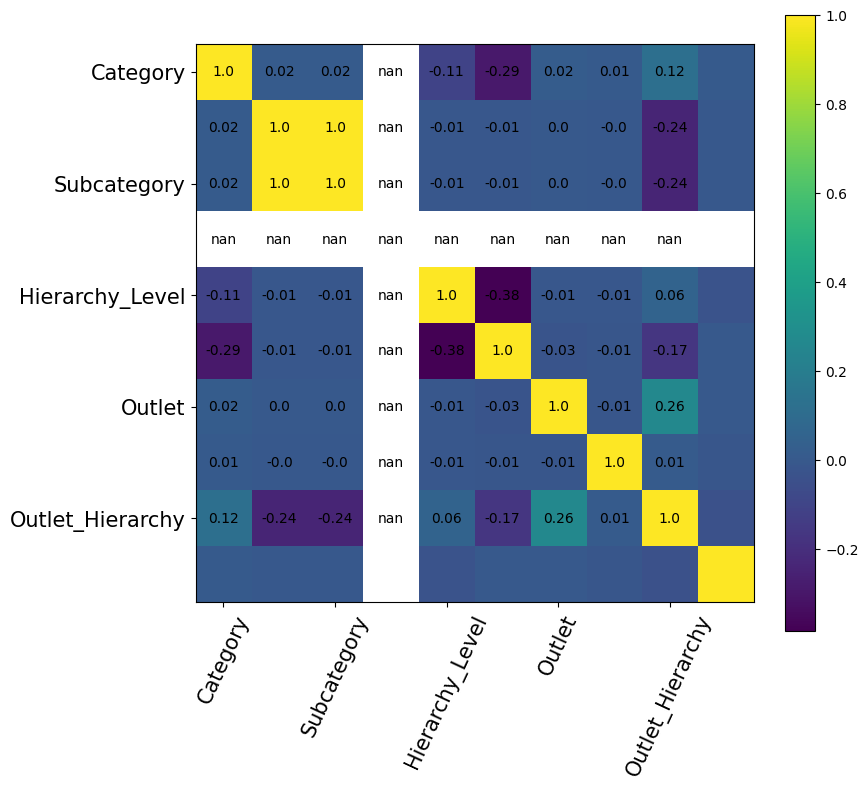

In [98]:

del df3['Edition']
df3.dropna(inplace=True)
corr = df3.corr(method='pearson')
#plt.imshow(corr,cmap='hot',interpolation='nearest')
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

# Show all ticks and label them with the dataframe column name
ax.set_xticklabels(df3.columns, rotation=65, fontsize=15)
ax.set_yticklabels(df3.columns, rotation=0, fontsize=15)

# Loop over data dimensions and create text annotations
for i in range(len(df3.columns)-1):
    for j in range(len(df3.columns)-1):
        text = ax.text(j, i, round(corr.to_numpy()[i, j], 2),
            ha="center", va="center", color="black")

plt.show()
